In [24]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [25]:
import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))


In [26]:
df=pd.read_csv("twitter_data.csv")

In [27]:
df.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [28]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [29]:
df['labels']=df['class'].map({0:"Hate Speech Detected",1:"Offensive Language Detected",2:"No Hate And Offensive Speech"})

In [30]:
df.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate And Offensive Speech
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language Detected
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language Detected
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language Detected
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language Detected
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",Offensive Language Detected
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",Offensive Language Detected
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,Offensive Language Detected
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",Offensive Language Detected
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",Offensive Language Detected


In [31]:
df=df[['tweet','labels']]

In [32]:
df.head(10)

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate And Offensive Speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language Detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language Detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language Detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language Detected
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",Offensive Language Detected
6,"!!!!!!""@__BrighterDays: I can not just sit up ...",Offensive Language Detected
7,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,Offensive Language Detected
8,""" &amp; you might not get ya bitch back &amp; ...",Offensive Language Detected
9,""" @rhythmixx_ :hobbies include: fighting Maria...",Offensive Language Detected


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

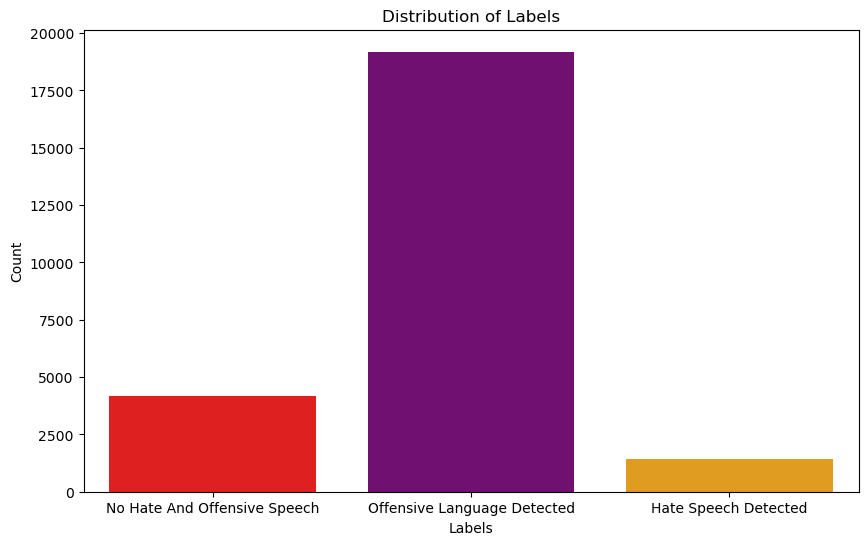

In [34]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='labels',palette=['red', 'purple', 'orange'])
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()


In [37]:
def clean(text):
    text = str(text).lower()
    # Remove square brackets and content within them
    text = re.sub('\[.*?\]', '', text)
    # Remove URLs (starting with http:// or www.)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)
    # Remove punctuation using the string module
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove newline characters
    text = re.sub('\n', '', text)
    # Remove alphanumeric words
    text = re.sub('\w*\d\w*', '', text)
    # Remove stopwords (common words with little meaning)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    # Perform stemming using the NLTK SnowballStemmer
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)

    return text
df["tweet"] = df["tweet"].apply(clean)

In [38]:
df.head()

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No Hate And Offensive Speech
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language Detected
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language Detected
3,rt cganderson vivabas look like tranni,Offensive Language Detected
4,rt shenikarobert shit hear might true might f...,Offensive Language Detected


In [39]:
df.isnull().sum()

tweet     0
labels    0
dtype: int64

In [40]:
x=np.array(df["tweet"])
y=np.array(df["labels"])

In [41]:
cv = CountVectorizer()
x = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [42]:
clf = DecisionTreeClassifier()

In [43]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
y_pred = clf.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.8702844462376438


In [53]:
test_data = " I will kill you"
df = cv.transform([test_data]).toarray()
print(clf.predict(df))

['Hate Speech Detected']
